## Ejercicio práctico: Equipos similares

Los pasos para realizar el ejercicio, son los siguientes:
1. Crear un notebook y cargar el fichero Excel adjunto (fbref_data.xlsx) en un DataFrame.
2. Instalar las librerías necesarias para cargar el Excel
3. Realizar las operaciones de transformación y limpieza del dato.
4. Seguir los pasos del ejemplo presentado en la lección (revisar nº clusters).
5. Crear una celda dentro del notebook con los siguientes análisis:
    - Top 5 de equipos similares al Elche.
    - Top 10 de equipos similares al Sassuolo.
    - Top 5 de equipos similares al Eibar.
6. Guardar el Notebook.

 Repetir el ejercicio para jugadores similares con datos de Instat.

Comenzamos con la importación de las librerías.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.decomposition import PCA

import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
import os
from pathlib import Path

In [2]:
base_dir = os.path.join('',Path(os.getcwd()).parents[1])
data_dir = os.path.join(base_dir, 'Data/Comps')

### Análisis Equipos

In [3]:
df = pd.read_excel(data_dir+'/FBREF_Defstats.xlsx')
df=df.set_index('Team')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98 entries, Alavés to Wolves
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Tkl               98 non-null     float64
 1   TklW              98 non-null     float64
 2   Tackles Def 3rd   98 non-null     float64
 3   Tackles Mid 3rd   98 non-null     float64
 4   Tackles  Att 3rd  98 non-null     float64
 5   Tkl Vs Dribbles   98 non-null     float64
 6   Att Vs Dribbles   98 non-null     float64
 7   Tkl% Vs Dribbles  98 non-null     float64
 8   Past Vs Dribbles  98 non-null     float64
 9   Press             98 non-null     float64
 10  Succ Press        98 non-null     float64
 11  % Press           98 non-null     float64
 12  Press Def 3rd     98 non-null     float64
 13  Press Mid 3rd     98 non-null     float64
 14  Press Att 3rd     98 non-null     float64
 15  Blocks            98 non-null     float64
 16  Shc               98 non-null     float64


In [4]:
df.head()

Tkl   TklW  Tackles Def 3rd  Tackles Mid 3rd  Tackles  Att 3rd  \
Team                                                                           
Alavés       15.3   9.23             7.70             6.07              1.57   
Angers       19.3  12.20             9.27             7.94              2.06   
Arminia      18.3  11.30             8.79             7.69              1.83   
Arsenal      13.5   8.45             6.35             5.42              1.74   
Aston Villa  15.6   9.37             7.13             6.23              2.23   

             Tkl Vs Dribbles  Att Vs Dribbles  Tkl% Vs Dribbles  \
Team                                                              
Alavés                  4.70             14.7              32.0   
Angers                  6.24             19.2              32.6   
Arminia                 5.34             17.0              31.4   
Arsenal                 4.84             13.9              34.8   
Aston Villa             5.80             15.5              37.3   

             Past Vs Dribbles  Press  ...  Press Mid 3rd  Press Att 3rd  \
Team                                  ...                                 
Alavés                   9.97  143.3  ...           65.1           31.3   
Angers                  12.90  162.8  ...           73.8           31.6   
Arminia                 11.70  166.5  ...           78.2           33.8   
Arsenal                  9.06  120.7  ...           49.6           31.5   
Aston Villa              9.73  136.0  ...           57.9           32.2   

             Blocks   Shc  ShSv Blocks  Pass Blocks    Int  Tkl+Int   Clr  \
Team                                                                        
Alavés         15.4  2.67         0.10         12.7  11.10     26.4  27.5   
Angers         14.8  2.73         0.00         12.1  10.90     30.2  23.8   
Arminia        18.4  3.86         0.07         14.6   8.59     26.9  28.9   
Arsenal        15.3  3.68         0.03         11.6   8.39     21.9  21.2   
Aston Villa    15.6  4.47         0.03         11.2   9.23     24.8  24.5   

              Err  
Team               
Alavés       0.23  
Angers       0.21  
Arminia      0.31  
Arsenal      0.19  
Aston Villa  0.37  

[5 rows x 23 columns]

Chequeamos si alguna de las columnas del dataframe presenta valores nulos (se marcaría con True)

In [5]:
df.isna().any()

Tkl                 False
TklW                False
Tackles Def 3rd     False
Tackles Mid 3rd     False
Tackles  Att 3rd    False
Tkl Vs Dribbles     False
Att Vs Dribbles     False
Tkl% Vs Dribbles    False
Past Vs Dribbles    False
Press               False
Succ Press          False
% Press             False
Press Def 3rd       False
Press Mid 3rd       False
Press Att 3rd       False
Blocks              False
Shc                 False
ShSv Blocks         False
Pass Blocks         False
Int                 False
Tkl+Int             False
Clr                 False
Err                 False
dtype: bool

### Distribuciones

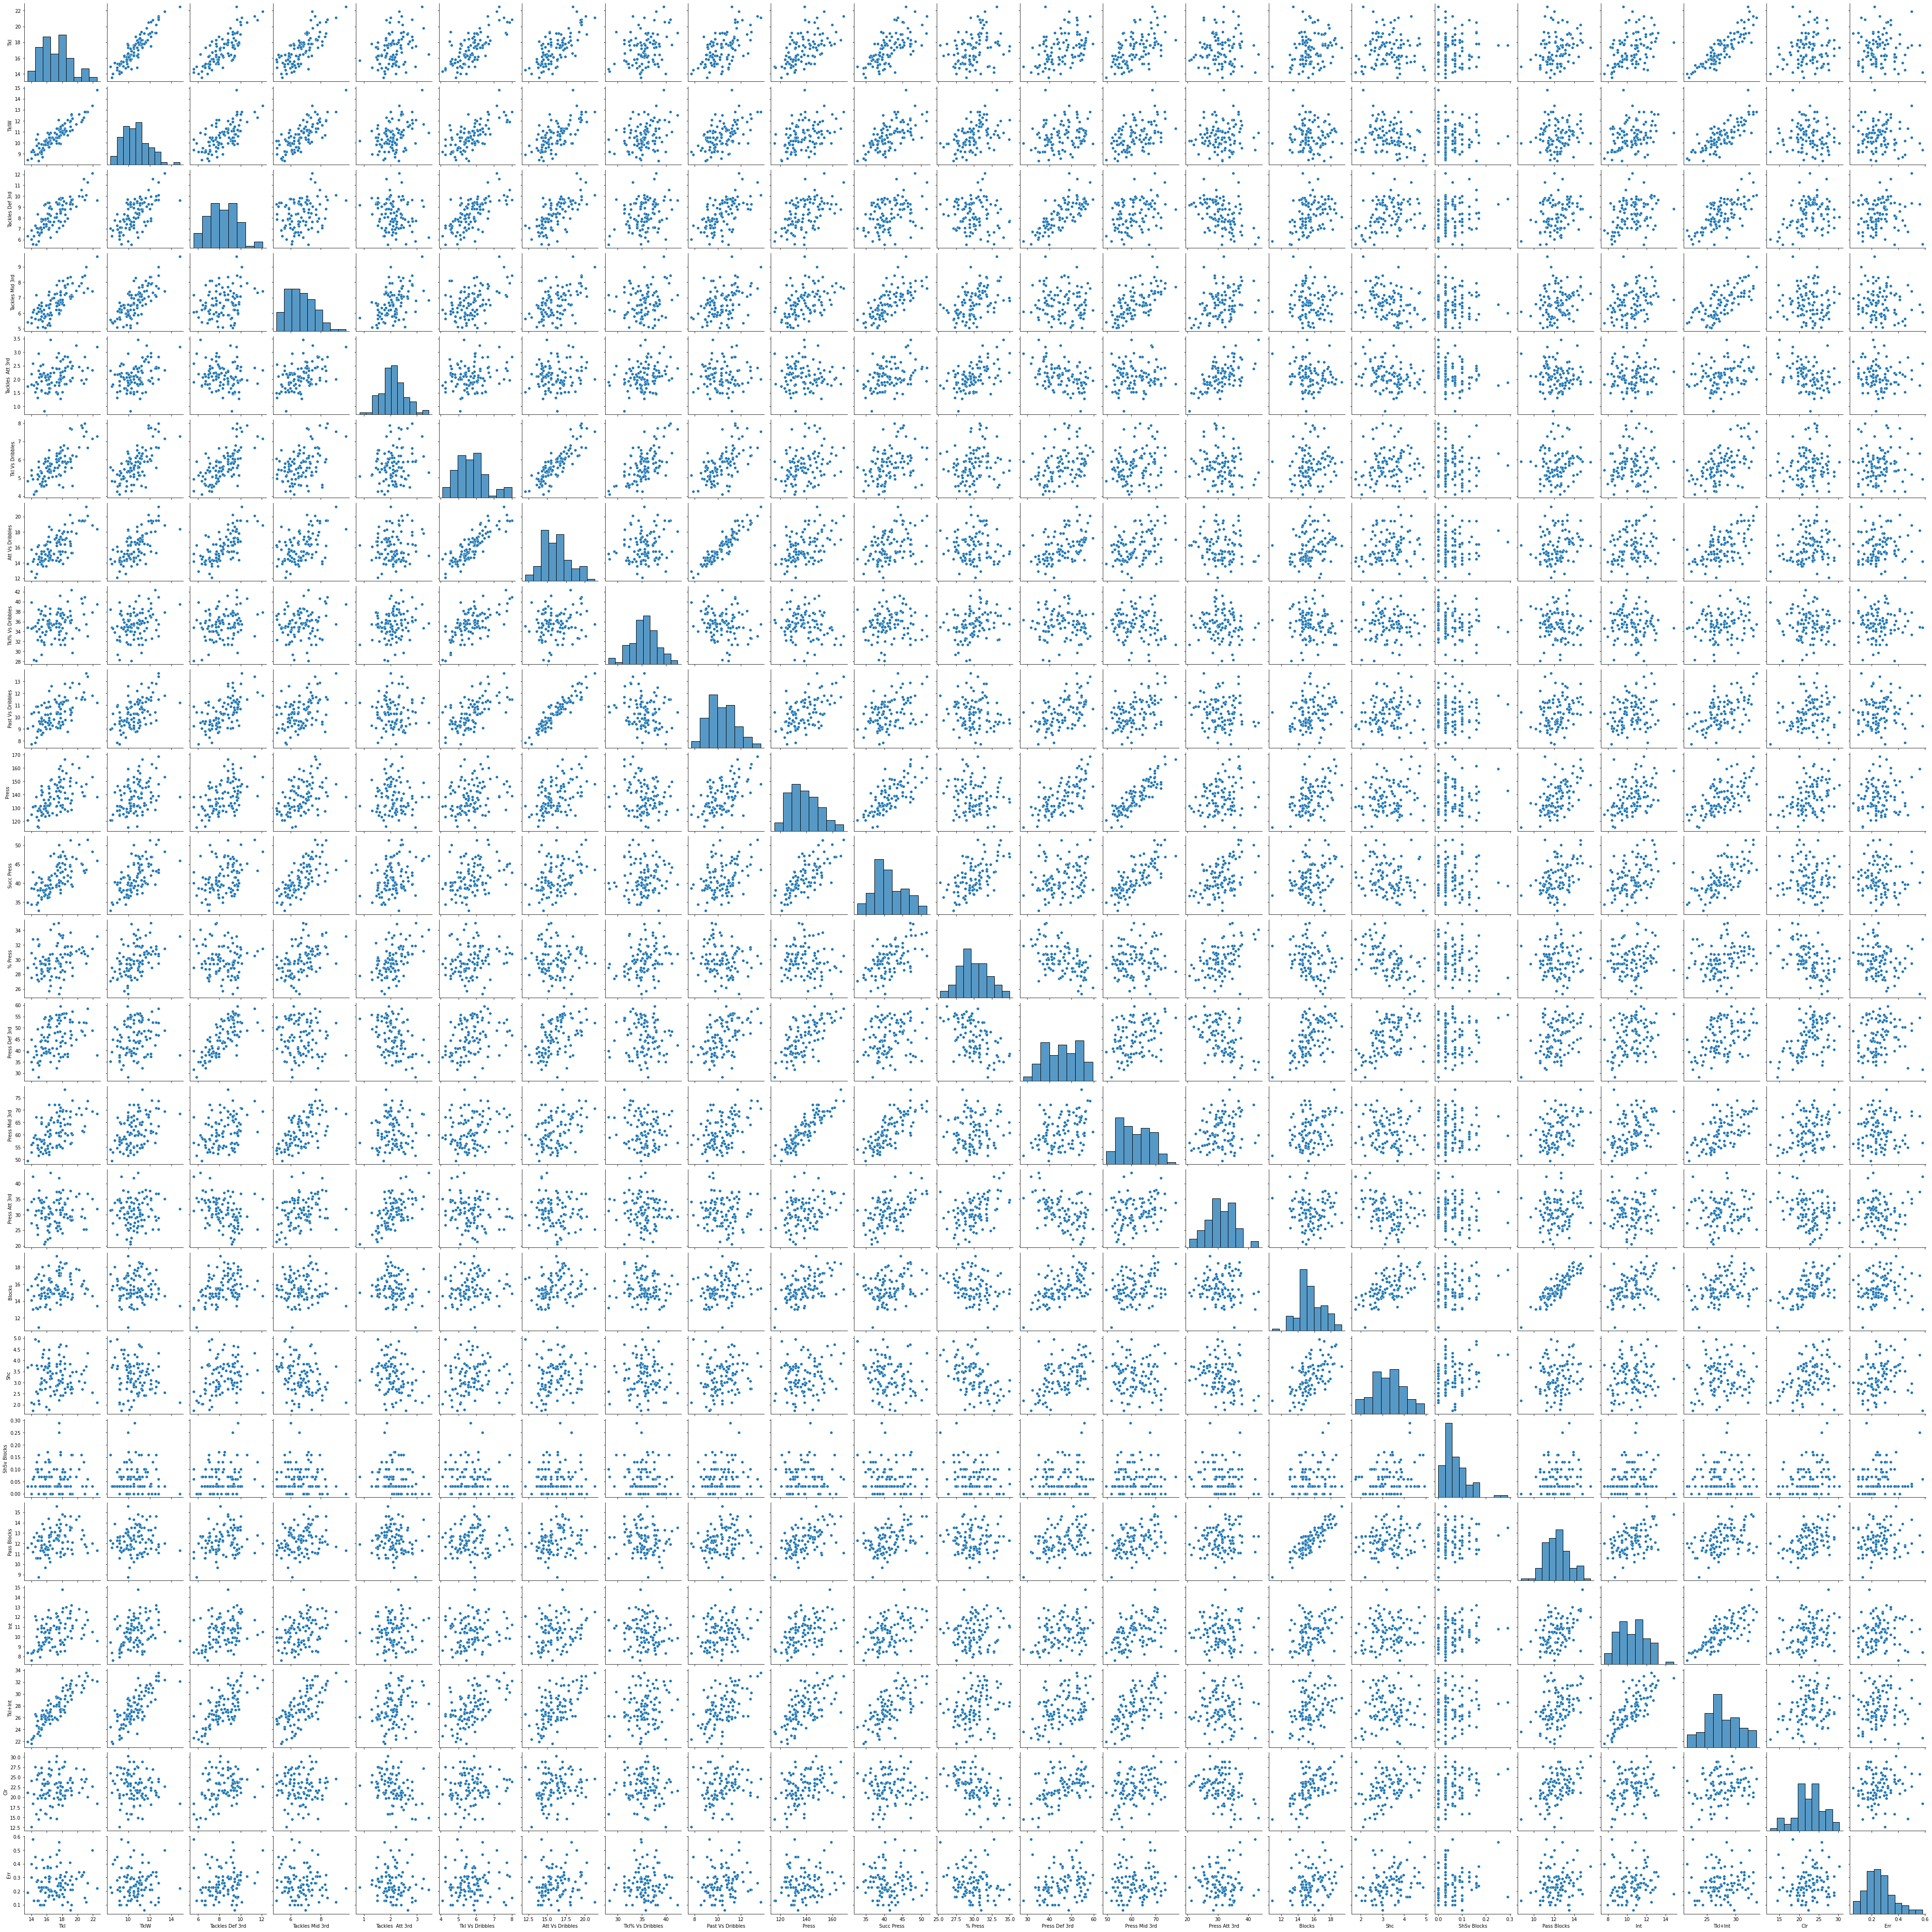

In [6]:
sns.pairplot(df)
plt.show()

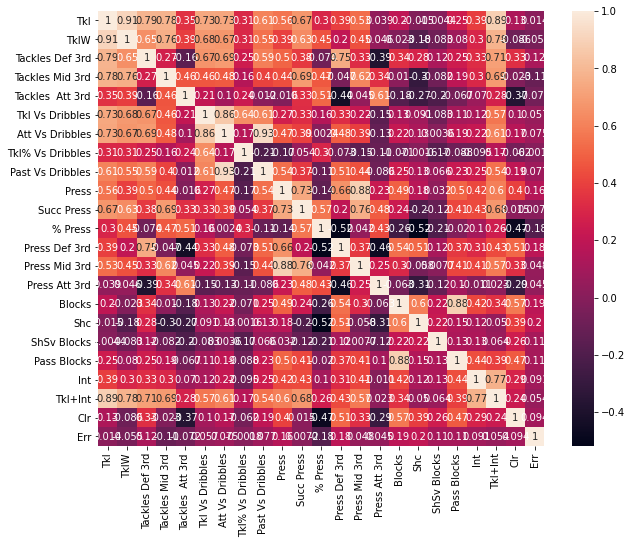

In [7]:
correlation_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot = True)
plt.show()

Sobre el dataframe importado, aplicamos StandardScaler.

In [8]:
scaled_list = preprocessing.StandardScaler().fit_transform(df)
df_scaled = pd.DataFrame(scaled_list , index=df.index, columns=df.columns)
df_scaled.head(10)

Tkl      TklW  Tackles Def 3rd  Tackles Mid 3rd  \
Team                                                                    
Alavés          -0.970255 -1.208866        -0.489261        -0.676376   
Angers           1.127594  1.331036         0.702407         1.361985   
Arminia          0.603132  0.561368         0.338076         1.089477   
Arsenal         -1.914287 -1.875911        -1.513944        -1.384898   
Aston Villa     -0.812917 -1.089140        -0.921905        -0.501971   
Atalanta         0.498239  0.817924        -0.792871         1.536390   
Athletic Club   -1.494718 -1.234522        -1.529124        -0.501971   
Atlético Madrid  1.075148  1.587592         0.975656         0.522660   
Augsburg         0.078669 -0.576029        -0.185651         0.642563   
Barcelona       -1.652056 -1.234522        -1.756832        -1.046988   

                 Tackles  Att 3rd  Tkl Vs Dribbles  Att Vs Dribbles  \
Team                                                                  
Alavés                  -1.204050        -1.181346        -0.749209   
Angers                  -0.115600         0.608162         1.667771   
Arminia                 -0.626505        -0.437654         0.486136   
Arsenal                 -0.826424        -1.018663        -1.178894   
Aston Villa              0.262026         0.096874        -0.319524   
Atalanta                 1.372690        -1.413749        -1.178894   
Athletic Club           -0.759785        -1.878557        -0.856630   
Atlético Madrid          0.639652         2.269849         1.076954   
Augsburg                -0.471012         0.166595         0.056451   
Barcelona                0.195386        -0.681678        -1.716001   

                 Tkl% Vs Dribbles  Past Vs Dribbles     Press  ...  \
Team                                                           ...   
Alavés                  -1.277023         -0.336021  0.448073  ...   
Angers                  -1.056562          2.103554  2.167138  ...   
Arminia                 -1.497484          1.104410  2.493320  ...   
Arsenal                 -0.248206         -1.093705 -1.544281  ...   
Aston Villa              0.670381         -0.535850 -0.195475  ...   
Atalanta                -1.166793         -0.785636  0.624387  ...   
Athletic Club           -2.636532          0.022005 -0.636261  ...   
Atlético Madrid          2.544298          0.022005 -0.847839  ...   
Augsburg                 0.229459          0.022005  0.791886  ...   
Barcelona                1.625711         -2.201089 -1.156389  ...   

                 Press Mid 3rd  Press Att 3rd    Blocks       Shc  \
Team                                                                
Alavés                0.564953       0.069400 -0.107872 -0.818679   
Angers                1.965589       0.136079 -0.509320 -0.735467   
Arminia               2.673957       0.625056  1.899366  0.831698   
Arsenal              -1.930434       0.113853 -0.174780  0.582062   
Aston Villa          -0.594194       0.269436  0.025944  1.677690   
Atalanta              1.369916       1.536331 -0.643135 -1.151528   
Athletic Club        -0.433202       0.913997 -0.643135 -1.706277   
Atlético Madrid      -0.771286      -0.352898  0.293576 -1.012841   
Augsburg              1.192824      -0.797423  2.501537  0.637536   
Barcelona            -0.900081       0.713961 -0.977675 -1.609196   

                 ShSv Blocks  Pass Blocks       Int   Tkl+Int       Clr  \
Team                                                                      
Alavés              0.672889     0.329170  0.452548 -0.440039  1.417102   
Angers             -1.138735    -0.165848  0.309068  0.933561  0.377989   
Arminia             0.129402     1.896727 -1.348129 -0.259302  1.810279   
Arsenal            -0.595248    -0.578363 -1.491609 -2.066669 -0.352198   
Aston Villa        -0.595248    -0.908375 -0.888992 -1.018396  0.574578   
Atalanta            0.672889    -0.165848  1.743870  1.258887 -0.576871   
Athletic Club       0.

In [9]:
pca = PCA(n_components=0.9, svd_solver='full')
matrix_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(matrix_pca, index=df_scaled.index)
df_pca.head(10)

0         1         2         3         4         5  \
Team                                                                          
Alavés          -1.394533 -1.914466  1.922797  1.053657 -1.071274 -0.136804   
Angers           4.353849  0.275211  0.300002  3.139340  0.067043 -1.145173   
Arminia          3.402216 -2.304116  2.888520  1.530054  1.310401 -1.385937   
Arsenal         -5.493673 -0.877964 -0.307254 -0.238831  0.489275 -0.737323   
Aston Villa     -2.082976 -1.239233 -0.591034 -0.557050  2.093758 -0.363003   
Atalanta         1.032064  3.318388  3.505488  0.206015 -1.505226  1.341090   
Athletic Club   -4.020973  0.323697  2.097995  2.437237 -0.583084 -0.088196   
Atlético Madrid  1.798282  1.967390 -2.863040 -1.914939 -0.446184 -1.549134   
Augsburg         2.466683 -2.462342  2.177498 -2.030391  0.180422 -1.234905   
Barcelona       -5.240316  2.602545  0.057777 -1.020725  1.149212 -1.263192   

                        6         7         8  
Team                                           
Alavés           0.161591  0.732829 -0.226949  
Angers           0.176079 -0.236514  0.291823  
Arminia         -0.900891  1.571312 -0.176292  
Arsenal         -0.934156 -0.403806 -0.081705  
Aston Villa      0.074460  0.207812  1.361789  
Atalanta         0.970046  0.014190  0.811844  
Athletic Club   -1.469517 -0.018180 -1.287496  
Atlético Madrid -1.410508  0.003040 -0.783205  
Augsburg         0.049327  0.028363 -1.080319  
Barcelona        0.927315  0.375792 -0.994065

In [10]:
var_explained = pca.explained_variance_ratio_.cumsum()
var_explained

array([0.34662668, 0.54053521, 0.65415717, 0.71727599, 0.7670586 ,
       0.81192561, 0.85071302, 0.88498021, 0.91489979])

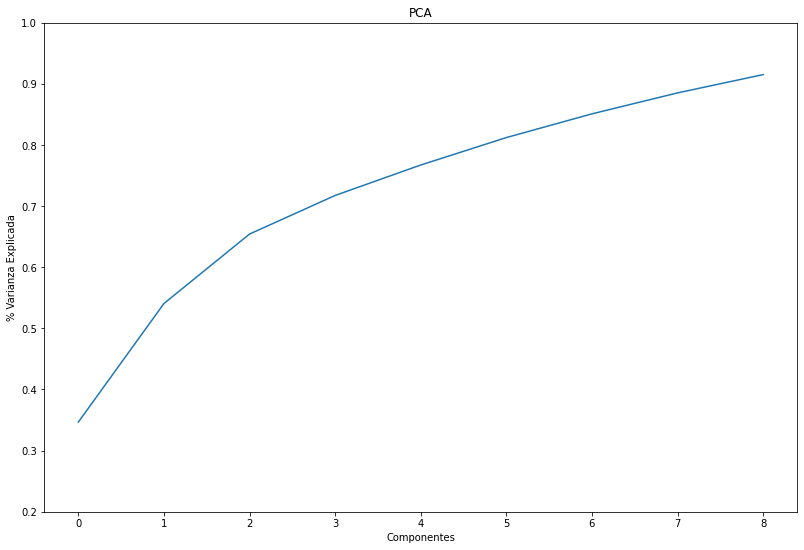

In [11]:
plt.figure(figsize=(13.5, 9))
plt.ylabel('% Varianza Explicada')
plt.xlabel('Componentes')
plt.title('PCA')
plt.ylim(0.2,1)
plt.plot(var_explained)
plt.show()

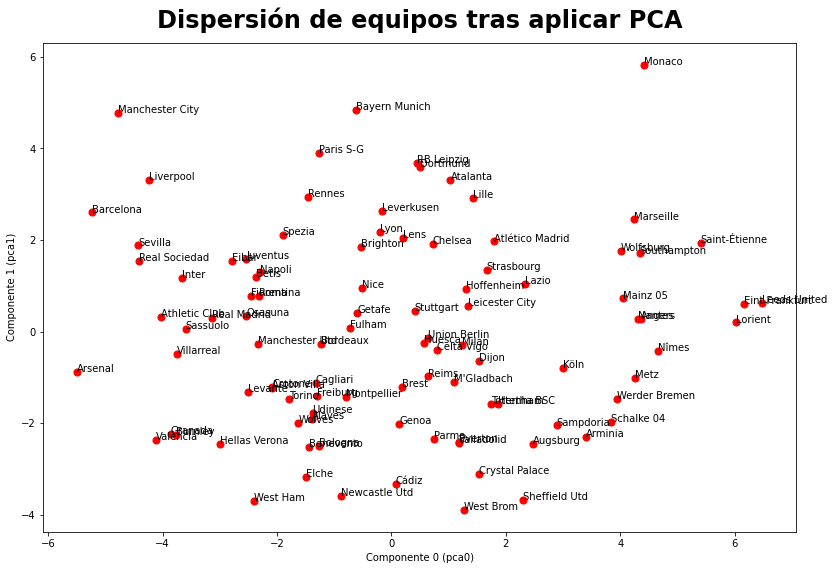

In [12]:
plt.figure(figsize=(13.5, 9))
ax = plt.axes()
plt.xlabel('Componente 0 (pca0)')
plt.ylabel('Componente 1 (pca1)')
plt.scatter(df_pca[0], df_pca[1], c='red', s=50)
plt.title('Dispersión de equipos tras aplicar PCA', fontsize=24, fontweight="bold", pad=15)

for team in df_pca.index:
    plt.text(df_pca[0][team], df_pca[1][team], team)

plt.show()

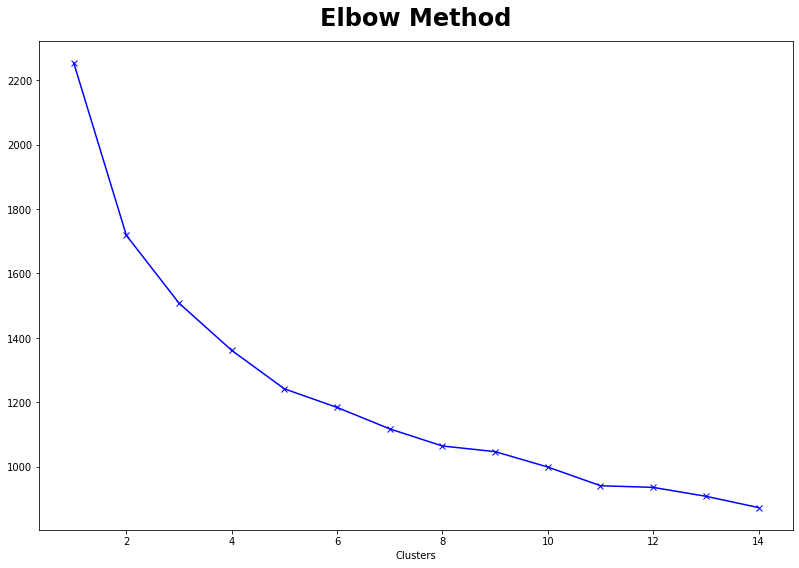

In [13]:
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_scaled)
    sum_of_squared_distances.append(km.inertia_)
plt.figure(figsize=(13.5, 9))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Clusters')
plt.title('Elbow Method', fontsize=24, fontweight="bold", pad=15)
plt.show()

In [14]:
clusters=4

In [15]:
kmeans_model = KMeans(clusters, random_state = 0)
kmeans_var = kmeans_model.fit_predict(df_pca)

df_pca['cluster'] = kmeans_model.labels_
df_pca['cluster'] = df_pca['cluster']
df_pca.head()

0         1         2         3         4         5  \
Team                                                                      
Alavés      -1.394533 -1.914466  1.922797  1.053657 -1.071274 -0.136804   
Angers       4.353849  0.275211  0.300002  3.139340  0.067043 -1.145173   
Arminia      3.402216 -2.304116  2.888520  1.530054  1.310401 -1.385937   
Arsenal     -5.493673 -0.877964 -0.307254 -0.238831  0.489275 -0.737323   
Aston Villa -2.082976 -1.239233 -0.591034 -0.557050  2.093758 -0.363003   

                    6         7         8  cluster  
Team                                                
Alavés       0.161591  0.732829 -0.226949        1  
Angers       0.176079 -0.236514  0.291823        0  
Arminia     -0.900891  1.571312 -0.176292        0  
Arsenal     -0.934156 -0.403806 -0.081705        2  
Aston Villa  0.074460  0.207812  1.361789        1

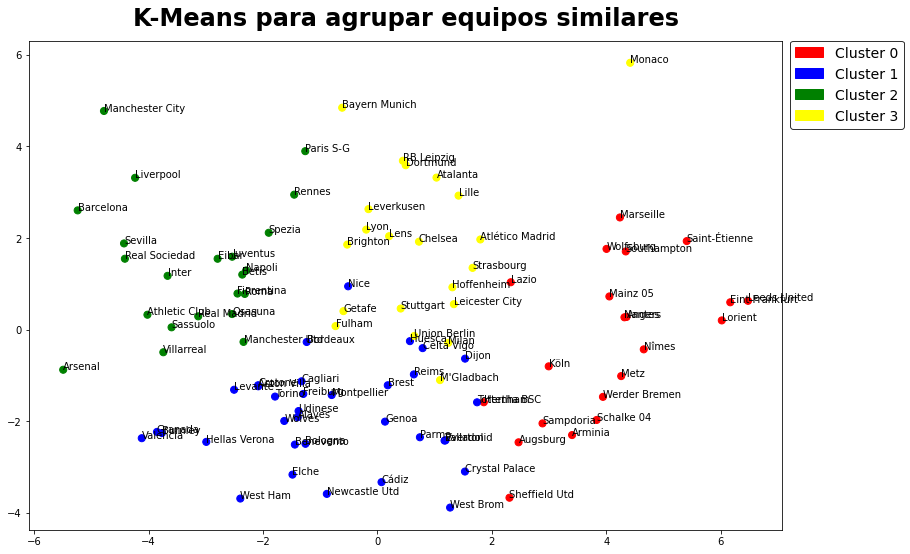

In [16]:
equipo = 'Celta'

labels = kmeans_model.labels_
patches = []
colors_array = ['red','blue','green', 'yellow']
colors = ListedColormap(colors_array)
plt.figure(figsize=(13.5, 9))
plt.scatter(x=df_pca[0], y=df_pca[1], c=labels, cmap=colors, s=50)

plt.title('K-Means para agrupar equipos similares', fontsize=24, fontweight="bold", pad=15)

for team in df_pca.index:
    plt.text(df_pca[0][team], df_pca[1][team], team)

for i in range(clusters):
    patches.append(mpatches.Patch(color=colors_array[i], label= "Cluster " + str(i)))

plt.legend(handles=patches,bbox_to_anchor=(1.01, 1), loc=2, frameon=True, edgecolor='black', prop={'size': 14}, borderaxespad=0.)

plt.show()

In [17]:
for i in range(clusters):
    print("Cluster " + str(i), df_pca[df_pca['cluster'] == i].index)

Cluster 0 Index(['Angers', 'Arminia', 'Augsburg', 'Eint Frankfurt', 'Hertha BSC', 'Köln',
       'Lazio', 'Leeds United', 'Lorient', 'Mainz 05', 'Marseille', 'Metz',
       'Nantes', 'Nîmes', 'Saint-Étienne', 'Sampdoria', 'Schalke 04',
       'Sheffield Utd', 'Southampton', 'Werder Bremen', 'Wolfsburg'],
      dtype='object', name='Team')
Cluster 1 Index(['Alavés', 'Aston Villa', 'Benevento', 'Bologna', 'Bordeaux', 'Brest',
       'Burnley', 'Cádiz', 'Cagliari', 'Celta Vigo', 'Crotone',
       'Crystal Palace', 'Dijon', 'Elche', 'Everton', 'Freiburg', 'Genoa',
       'Granada', 'Hellas Verona', 'Huesca', 'Levante', 'Montpellier',
       'Newcastle Utd', 'Nice', 'Parma', 'Reims', 'Torino', 'Tottenham',
       'Udinese', 'Valencia', 'Valladolid', 'West Brom', 'West Ham', 'Wolves'],
      dtype='object', name='Team')
Cluster 2 Index(['Arsenal', 'Athletic Club', 'Barcelona', 'Betis', 'Eibar', 'Fiorentina',
       'Inter', 'Juventus', 'Liverpool', 'Manchester City', 'Manchester Utd',
      

In [18]:
corr_matrix = np.corrcoef(matrix_pca)
df_dist = pd.DataFrame(corr_matrix, index=df.index, columns=df.index)
df_dist

Team             Alavés    Angers   Arminia   Arsenal  Aston Villa  Atalanta  \
Team                                                                           
Alavés         1.000000 -0.123761  0.376042  0.393681     0.089036  0.098415   
Angers        -0.123761  1.000000  0.588818 -0.701450    -0.536422 -0.086594   
Arminia        0.376042  0.588818  1.000000 -0.377038    -0.141480 -0.200420   
Arsenal        0.393681 -0.701450 -0.377038  1.000000     0.720350 -0.143652   
Aston Villa    0.089036 -0.536422 -0.141480  0.720350     1.000000 -0.613117   
...                 ...       ...       ...       ...          ...       ...   
Werder Bremen  0.057520  0.610141  0.651870 -0.712803    -0.449630  0.289195   
West Brom      0.347004  0.060471  0.421524 -0.259202    -0.048279 -0.233499   
West Ham       0.664270 -0.196163  0.087318  0.440342     0.416123 -0.457623   
Wolfsburg     -0.177494  0.437769  0.426509 -0.734716    -0.699725  0.561789   
Wolves         0.094150  0.001260 -0.275247  0.210310     0.365585 -0.598568   

Team           Athletic Club  Atlético Madrid  Augsburg  Barcelona  ...  \
Team                                                                ...   
Alavés              0.630008        -0.853016  0.201417   0.028703  ...   
Angers             -0.279692         0.303602  0.291039  -0.685848  ...   
Arminia            -0.067172        -0.126151  0.772489  -0.573510  ...   
Arsenal             0.710217        -0.564774 -0.514498   0.774919  ...   
Aston Villa         0.102146        -0.339980 -0.179814   0.424017  ...   
...                      ...              ...       ...        ...  ...   
Werder Bremen      -0.429878         0.039339  0.797909  -0.709517  ...   
West Brom          -0.185550        -0.257539  0.362800  -0.697821  ...   
West Ham            0.355886        -0.827318 -0.081245  -0.074403  ...   
Wolfsburg          -0.367752         0.449259  0.663932  -0.343331  ...   
Wolves             -0.111398        -0.146492 -0.466512  -0.039365  ...   

Team            Udinese  Union Berlin  Valencia  Valladolid  Villarreal  \
Team                                                                      
Alavés         0.209461      0.100665  0.341912    0.434456    0.566544   
Angers        -0.217793      0.170942 -0.501068    0.641685   -0.646332   
Arminia       -0.057297      0.032126 -0.100461    0.826657   -0.307642   
Arsenal        0.381558     -0.452884  0.832442   -0.184731    0.904709   
Aston Villa    0.615054     -0.480400  0.832453   -0.050765    0.440917   
...                 ...           ...       ...         ...         ...   
Werder Bremen -0.289902      0.405634 -0.638927    0.382523   -0.674425   
West Brom     -0.036628     -0.157842 -0.048854    0.469885   -0.026806   
West Ham       0.687817     -0.237993  0.659301    0.438660    0.534711   
Wolfsburg     -0.589111      0.580144 -0.810748   -0.022176   -0.670298   
Wolves         0.556630      0.009137  0.366060    0.065897    0.116305   

Team           Werder Bremen  West Brom  West Ham  Wolfsburg    Wolves  
Team                                                                    
Alavés              0.057520   0.347004  0.664270  -0.177494  0.094150  
Angers              0.610141   0.060471 -0.196163   0.437769  0.001260  
Arminia             0.651870   0.421524  0.087318   0.426509 -0.275247  
Arsenal            -0.712803  -0.259202  0.440342  -0.734716  0.210310  
Aston Villa        -0.449630  -0.048279  0.416123  -0.699725  0.365585  
...                      ...        ...       ...        ...       ...  
Werder Bremen       1.000000   0.260544 -0.228473   0.736856 -0.416978  
West Brom           0.260544   1.000000  0.474513  -0.066086  0.147599  
West Ham           -0.228473   0.474513  1.000000  -0.696397  0.544513  
Wolfsburg           0.736856  -0.066086 -0.696397   1.000000 -0.682716  
Wolves             -0.416978   0.147599  0.544513  -0.682716  1.000000  

[98 rows x 98 columns]

In [19]:
team = []
for i in df_dist.index:
    if equipo in i:
        print(i)
        team.append(i)
team = team[0]

Celta Vigo


In [20]:
print('Top 10 Similar Teams to {}'.format(team))
df_dist[team].sort_values(ascending=False)[1:10]

Top 10 Similar Teams to Celta Vigo


Team
Valladolid    0.765537
Angers        0.702230
Arminia       0.675295
Huesca        0.654005
Getafe        0.501806
Lazio         0.471172
Alavés        0.406254
Elche         0.401150
Parma         0.399679
Name: Celta Vigo, dtype: float64

In [21]:
def team_similarities(equipo,num=10):
    team = []
    for i in df_dist.index:
        if equipo in i:
            print(i)
            team.append(i)
    team = team[0]
    print('Top {} Similar Teams to {}'.format(num,team))
    return df_dist[team].sort_values(ascending=False)[1:num+1]

In [22]:
team_similarities('Elche',5)

Elche
Top 5 Similar Teams to Elche


Team
West Ham     0.834946
Benevento    0.727091
Cádiz        0.711438
Parma        0.701335
Wolves       0.675637
Name: Elche, dtype: float64

In [23]:
team_similarities('Sassuolo',10)

Sassuolo
Top 10 Similar Teams to Sassuolo


Team
Inter            0.889254
Arsenal          0.841103
Juventus         0.776454
Aston Villa      0.768758
Barcelona        0.732998
Burnley          0.705989
Fiorentina       0.692408
Real Sociedad    0.647210
Hellas Verona    0.627656
Villarreal       0.625172
Name: Sassuolo, dtype: float64

In [24]:
team_similarities('Eibar',5)

Eibar
Top 5 Similar Teams to Eibar


Team
Liverpool        0.813382
Athletic Club    0.797665
Barcelona        0.765892
Real Sociedad    0.752549
Villarreal       0.737672
Name: Eibar, dtype: float64

### Análisis Jugadores

Estableceremos que trabajamos como analistas de datos en el área de reclutamiento del Celta de Vigo.

El conjunto gallego estaba, en el momento en que se cerró el mercado de verano, en vías de encontrar una salida al que ha sido la gran brújula del equipo en los últimos años, el pontevedrés Denis Suárez, principalmente por desavenencias con la directiva actual.

El equipo de reclutamiento debe buscar un perfil que se adapte al rol de organizador que Denis estaba asumiendo en los últimos años, principalmente desde la llegada al banquillo del argentino Eduardo Coudet. El objetivo será, pues, conseguir una lista filtrada de 25 futbolistas similares a Denis Suárez, que se harán llegar a la dirección deportiva.

Dado que realizaremos el análisis con una clara vocación práctica, trataremos de, en primer lugar, ilustrar el rol sobre el que trabajaremos y su contexto.

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
from mplsoccer.pitch import Pitch
import xml.etree.ElementTree as et
import numpy as np
from matplotlib.colors import to_rgba

In [26]:
base_dir = os.path.join('',Path(os.getcwd()).parents[1])
data_dir_eventing = os.path.join(base_dir, 'Data/Eventing_LaLiga')

In [27]:
file = '07-05-2022--Spain--Primera-DivisionCelta-de-Vigo-4-0-Alaves20220815-66695-imnyxl.xml'
file_full = os.path.join(data_dir_eventing,file)
descanso = 45*60
fecha = file[:10]
tree = et.parse(file_full)
root = tree.getroot()

node_names = ['ID', 'start', 'end', 'code', 'pos_x', 'pos_y']
node_names_full = []
matrix = []
for node in root.iter('ALL_INSTANCES'):
    for instance in node.iter('instance'):
        if instance.find('code').text!='Empezar marca de tiempo':
            row=[]
            for node_name in node_names:
                row.append(instance.find(node_name).text)
            for label in instance.iter('label'):
                row.append(label.find('text').text)
                if label.find('group').text not in node_names_full and label.find('group').text not in node_names:
                    node_names_full.append(label.find('group').text)
            matrix.append(row)

In [28]:
df = pd.DataFrame(data = matrix,columns = node_names+node_names_full)
df.rename({'code':'Player','Medio':'Half'},axis=1,inplace=True)
for i in ['ID','start','end','pos_x','pos_y']:
    df[i] = pd.to_numeric(df[i])
    
tit = list(df[(df['Half'].str.contains('1')) & (df.Equipo.str.contains('Celta'))]['Player'].unique())
df_pases = df[(df['Accion']=='Pases precisos') & (df.Equipo.str.contains('Celta'))]
df['Rec_x'] = 0
df['Rec_y'] = 0
df['Rec_Jugador'] = ''
df['Rec_Outcome'] = ''

for i,j in df_pases.iterrows():
    player = df_pases.loc[i,'Player']
    team = df_pases.loc[i,'Equipo']
    if j['Accion'] == 'Pases precisos':
        for k,h in df[i:].iterrows():
            if player!=h['Player'] and team==h['Equipo']:
                df_pases.loc[i,'Rec_x']= df.loc[k,'pos_x']
                df_pases.loc[i,'Rec_y']= df.loc[k,'pos_y']
                df_pases.loc[i,'Rec_Jugador']= df.loc[k,'Player']
                if team==h['Equipo']:
                    df_pases.loc[i,'Rec_Outcome']= 'Propio'
                else:
                    df_pases.loc[i,'Rec_Outcome']= 'Rival'
                break
df_pos= df_pases.groupby('Player').agg({'pos_x':['mean'],'pos_y':['mean'],'Player':['count']})
df_pos.columns = ['_'.join(col) for col in df_pos.columns.values if col!='Player']
df_pos = df_pos.reset_index()
df_pos = df_pos[df_pos.Player.isin(tit)]

df_rec= df_pases.groupby('Rec_Jugador').agg({'Rec_x':['mean'],'Rec_y':['mean'],'Player':['count']})
df_rec.columns = ['_'.join(col) for col in df_rec.columns.values]
df_rec = df_rec.reset_index()

df_rel = df_pases.groupby(by=['Player','Rec_Jugador'],as_index=False)['Accion'].count()
df_rel.rename({'Accion':'count'},axis=1,inplace=True)
df_rel['Flag'] = 0
df_aux = df_rel

matrix = []

for i,j in df_rel.iterrows():
    for k,h in df_aux.iterrows():
        if df_rel.loc[i,'Flag']==0:
            matrix.append([j['Player'],j['Rec_Jugador'],j['count']])
            df_rel.loc[i,'Flag']=1
        elif (j['Player']==h['Rec_Jugador']) and (j['Rec_Jugador']==h['Player']) and (df_rel.loc[k,'Flag']==0):
            matrix.append([h['Rec_Jugador'],h['Player'],h['count']])
            df_rel.loc[k,'Flag']=1
            
df_rel = pd.DataFrame(data=matrix,columns=['Player','Rec_Jugador','count'])
df_rel = df_rel.groupby(by=['Player','Rec_Jugador'],as_index=False)['count'].sum()
df_rel.rename({'count':'sum'},axis=1,inplace=True)

df_merged = pd.merge(df_rel,df_pos,how='left',on='Player')
df_merged.columns = ['Passer','Receiver','Passes','passer_x','passer_y','count_passer']
df_merged = pd.merge(df_merged,df_pos,how='left',left_on='Receiver',right_on='Player')

df_merged.drop('Player',axis=1,inplace=True)
df_merged.rename({'pos_x_mean':'receiver_x','pos_y_mean':'receiver_y','Player_count':'count_receiver'},
                inplace=True,axis=1)
df_merged.head()

max_line_width = 18
max_marker_size = 3000
df_merged['width'] = df_merged.Passes / df_merged.Passes.max() * max_line_width
df_pos['marker_size'] = (df_pos['Player_count']
                                         / df_pos['Player_count'].max() * max_marker_size)

C:\Users\aleex\AppData\Local\Temp/ipykernel_11752/1689905840.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pases.loc[i,'Rec_x']= df.loc[k,'pos_x']
C:\Users\aleex\AppData\Local\Temp/ipykernel_11752/1689905840.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pases.loc[i,'Rec_y']= df.loc[k,'pos_y']
C:\Users\aleex\AppData\Local\Temp/ipykernel_11752/1689905840.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [29]:
df_merged = df_merged[df_merged['Passes']>3]

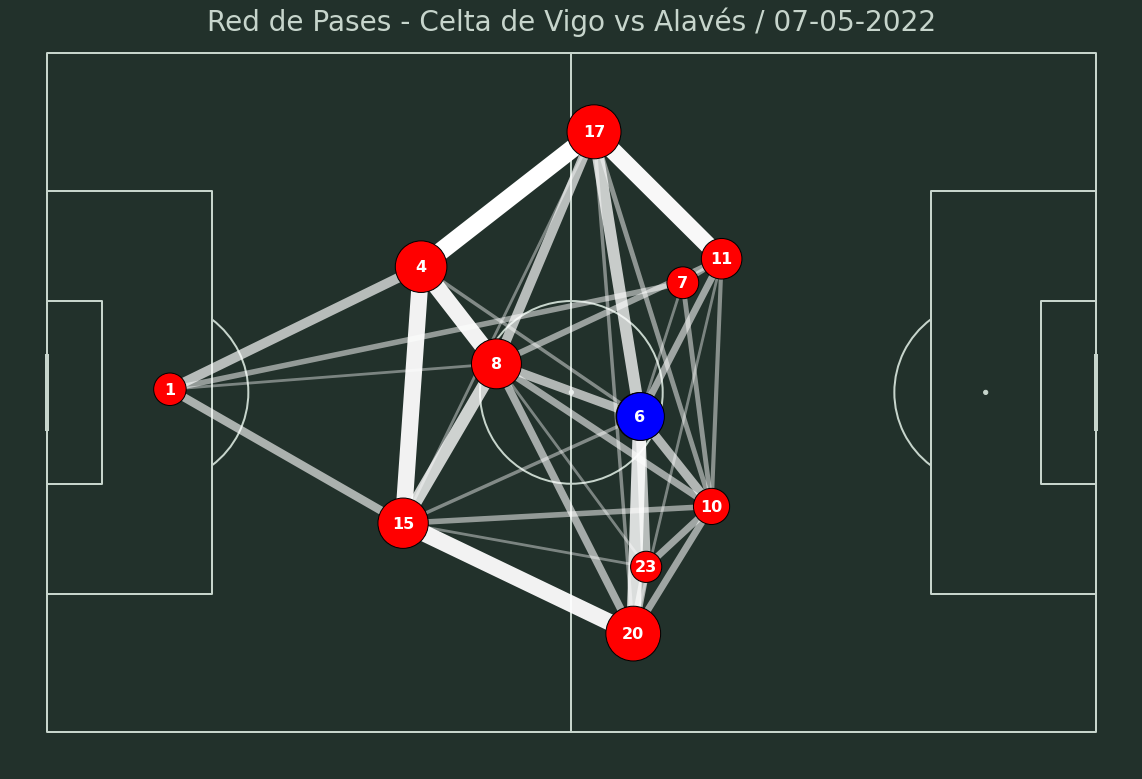

In [30]:
min_transparency = 0.3
color = np.array(to_rgba('white'))
color = np.tile(color, (df_merged.shape[0], 1))
c_transparency = df_merged.Passes / df_merged.Passes.max()
c_transparency = (c_transparency * (1 - min_transparency)) + min_transparency
color[:, 3] = c_transparency

pitch = Pitch(pitch_type='uefa',
              pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11))
pass_lines = pitch.lines(df_merged.passer_x, df_merged.passer_y,
                         df_merged.receiver_x, df_merged.receiver_y, lw=df_merged.width,
                         color=color, zorder=1, ax=ax)
df_pos2 = df_pos[df_pos['Player'].str.contains('Denis')] 
df_pos1 = df_pos[~df_pos.isin(list(df_pos2.Player))]
pass_nodes = pitch.scatter(df_pos1.pos_x_mean, df_pos1.pos_y_mean, s=df_pos1.marker_size,
                           color='red', edgecolors='black', linewidth=1, alpha=1, ax=ax)
pass_nodes = pitch.scatter(df_pos2.pos_x_mean, df_pos2.pos_y_mean, s=df_pos2.marker_size,
                           color='blue', edgecolors='black', linewidth=1, alpha=1, ax=ax)
for i, j in df_pos.iterrows():
    dorsal = j['Player'].split('.')
    d = dorsal[0]
    pitch.annotate(d, xy=(j['pos_x_mean'], j['pos_y_mean']), c='white', va='center', ha='center', size=16, weight='bold', ax=ax)
title = ax.set_title("Red de Pases - {} vs {} / {}".format(df_pases.Equipo.head(1).values[0], 'Alavés',fecha), size=28, y=0.97, color='#c7d5cc')
fig.set_facecolor("#22312b")

Vemos que Denis Suárez (6) asume un rol clave en el particular sistema de Eduardo Coudet. En un dibujo en el que las bandas son exclusivamente para los laterales, que siempre están abiertos (y por ello asumen tanto balón), las alas del rombo buscan constantemente la profoundidad y la llegada, participando poco en la construcción.

El buildup se lo reparten las dos piezas centrales del rombo, si bien cada uno tiene una función distinta. El vértice, en este caso el madrileño Fran Beltrán, se encarga de dar salida, situándose entre centrales y permitiendo que los laterales ganen profundidad. Por su parte, Denis suele esperar entre líneas, teniendo la responsabilidad efectiva de orquestar los ataques y de conectar con la pieza clave del equipo en ataque, Iago Aspas, o con los laterales, que suelen esperar el balón muy arriba. Si en salida de balón el equipo se ahoga, Denis suele bajar y caer a una banda para facilitar el pase al central de ese lado. Por tanto, si bien observando exclusivamente el dibujo puede parecer que Coudet dispone un rombo, el rol del "6" dista mucho de ser el de mediapunta. De igual modo, el papel de las alas -Brais Méndez y Franco Cervi- está muy lejos de ser el de un interior típico de un 4-3-3, siendo infrecuente que éstos asuman un papel de apoyo en construcción.

In [31]:
import glob
from scipy.spatial import distance
from yellowbrick.cluster.elbow import kelbow_visualizer
def elbow_method(X, max_range_for_elbow):
    return kelbow_visualizer(KMeans(random_state=0), X, k=(1, max_range_for_elbow)) 

dfs=[]
for i in glob.glob(data_dir+'/Players/*.xlsx'):
    k = i.split('.')
    k= k[-2]
    k = k.replace('PrimeraDivision','LaLiga')
    if '2022' in i:
        data = pd.read_excel(i)
        data['Comp'] = k
        dfs.append(data)
        
df = pd.concat(dfs)
df.head()

Unnamed: 0       Unnamed: 1 Índice InStat  Partidos jugados  \
0        27.0     Joao Cancelo           300                36   
1        16.0            Rodri           299                33   
2         4.0  Virgil van Dijk           294                34   
3        26.0     A. Robertson           291                29   
4        23.0          L. Díaz           291                13   

   Minutos jugados Starting lineup appearances Jugador sustituido  \
0               90                        0.94               0.03   
1               90                        0.96               0.12   
2               90                        0.93                  -   
3               90                        0.96                0.1   
4               90                        0.98               0.62   

  De sustitucion Goles Asistencias  ...           Nacionalidad     Equipo  \
0              -  0.03        0.21  ...               Portugal   Man City   
1              -   0.2        0.06  ...                  Spain   Man City   
2              -  0.08        0.03  ...  Netherlands, Suriname  Liverpool   
3              -   0.1        0.33  ...               Scotland  Liverpool   
4           0.18  0.36        0.27  ...               Colombia  Liverpool   

  Selección nacional Edad Altura Peso   Pierna  \
0           Portugal   28    182   74  Derechа   
1              Spain   26    191   82  Derechа   
2        Netherlands   31    193   92  Derechа   
3           Scotland   28    178   64    Zurda   
4           Colombia   25    178   65  Derechа   

  National team (last match date, mm.yy)  \
0                                  06.22   
1                                  06.22   
2                                  06.22   
3                                  06.22   
4                                  03.22   

  Youth national team (last match date, mm.yy)           Comp  
0                                        06.17  PremierLeague  
1                                        11.17  PremierLeague  
2                                        11.11  PremierLeague  
3                                        11.15  PremierLeague  
4                                        02.17  PremierLeague  

[5 rows x 84 columns]

In [32]:
df.rename({'Unnamed: 0':'Num','Unnamed: 1':'Jugador'},axis=1,inplace=True)
df.shape

(2637, 84)

In [33]:
df.drop('Num',inplace=True,axis=1)
num_cols = ['Partidos jugados','Minutos jugados','Starting lineup appearances', 'Jugador sustituido',
       'De sustitucion', 'Goles', 'Asistencias', 'Fueras de juego',
       'Tarjetas amarillas', 'Tarjetas rojas', 'Tiros', 'Tiros a portería',
       'Penalti', 'Penaltis marcados', '% de penaltis marcados', 'Pases',
       '% de efectividad de pases', 'Pases de finalización', 'Centros',
       '% de efectividad de los centros', 'Balones perdidos',
       'Pérdidas en campo propio', 'Balones recuperados',
       'Recuperaciones en campo rival', 'Goles esperados', 'Disputas',
       '% disputas ganadas', 'Disputas en ataque', 'Disputas aéreas',
       '% disputas por arriba ganadas', 'Regates', 'Entradas',
       'Interceptaciones', 'Rechaces', 'Jugadas de gol',
       'Oportunidades de gol con éxito', 'Ocasiones de gol, % conversión',
       'Ocasiones generadas', 'Faltas', 'Faltas recibidas', 'Acciones totales',
       'Acciones efectivas', '% acciones efectivas',
       '% de efectividad en lanzamientos', 'Tiros fuera',
       'Tiros interceptados', 'Tiros en el poste / palo', 'Pases efectivos',
       'Pases de finalización efectivos', 'Centros efectivos',
       'Disputas ganadas', 'Disputas defensivas',
       'Disputas defensivas ganadas', '% disputas defensivas ganadas',
       'Disputas en ataque ganadas', '% disputas en ataque ganadas',
       'Disputas por arriba ganadas', 'Regates efectivos',
       'Regates con éxito, %', 'Entradas efectivas',
       'Robos de balón con éxito, %', 'Expected assists', 'xG per shot',
       'xG per goal', 'xG conversion', 'xG with a player on',
       "Opponent's xG with a player on",
       "Net xG (xG player on - opp. team's xG)",
       'Defensive xG (xG of shots made by guarded player)',
       'Defensive xG per shot']

rel_cols = ['Goles', 'Asistencias',
       'Tarjetas amarillas', 'Tarjetas rojas', 'Tiros', 'Tiros a portería', 'Pases',
       '% de efectividad de pases', 'Pases de finalización', 'Centros',
       '% de efectividad de los centros', 'Balones perdidos',
       'Pérdidas en campo propio', 'Balones recuperados',
       'Recuperaciones en campo rival', 'Goles esperados', 'Disputas',
       '% disputas ganadas', 'Disputas en ataque', 'Disputas aéreas',
       '% disputas por arriba ganadas', 'Regates', 'Entradas',
       'Interceptaciones', 'Rechaces', 'Jugadas de gol',
       'Oportunidades de gol con éxito', 'Ocasiones de gol, % conversión',
       'Ocasiones generadas', 'Faltas', 'Faltas recibidas', 'Acciones totales',
       'Acciones efectivas', '% acciones efectivas',
       '% de efectividad en lanzamientos', 'Tiros fuera',
       'Tiros interceptados', 'Tiros en el poste / palo', 'Pases efectivos',
       'Pases de finalización efectivos', 'Centros efectivos',
       'Disputas ganadas', 'Disputas defensivas',
       'Disputas defensivas ganadas', '% disputas defensivas ganadas',
       'Disputas en ataque ganadas', '% disputas en ataque ganadas',
       'Disputas por arriba ganadas', 'Regates efectivos',
       'Regates con éxito, %', 'Entradas efectivas',
       'Robos de balón con éxito, %', 'Expected assists', 'xG per shot',
       'xG per goal', 'xG conversion', 'xG with a player on',
       "Opponent's xG with a player on",
       "Net xG (xG player on - opp. team's xG)",
       'Defensive xG (xG of shots made by guarded player)',
       'Defensive xG per shot']

In [34]:
for i in df.columns:
    if i in num_cols:
        df[i]=df[i].astype(str)
        df[i]=df[i].str.replace('-','0')
        df[i]=df[i].str.replace('%','')
        df[i] = pd.to_numeric(df[i])
    else:
        df[i]=df[i].astype(str)

In [35]:
df_filt = df[(df['Partidos jugados']>=8) & (df['Starting lineup appearances']>=0.1)]
df_filt.shape[0]

2042

In [36]:
df_filt = df_filt.sort_values(by='Partidos jugados',ascending=False)
df_filt = df_filt.drop_duplicates(subset='Jugador',keep='first')
df_filt = df_filt.set_index('Jugador')
df_filt.shape

(2014, 82)

In [37]:
df_filt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2014 entries, Jose Fonte to Eray Ervin Comert
Data columns (total 82 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Índice InStat                                      2014 non-null   object 
 1   Partidos jugados                                   2014 non-null   int64  
 2   Minutos jugados                                    2014 non-null   int64  
 3   Starting lineup appearances                        2014 non-null   float64
 4   Jugador sustituido                                 2014 non-null   float64
 5   De sustitucion                                     2014 non-null   float64
 6   Goles                                              2014 non-null   float64
 7   Asistencias                                        2014 non-null   float64
 8   Fueras de juego                                    2014 non-null   floa

Consideramos que existen dos variables categóricas que, cuando se refiere a jugadores, cobran una importancia clave en el análisis de similitudes entre ellos. Por un lado, la pierna buena puede ser determinante a la hora de ofrecer unos resultados más precisos, así que emplearemos OneHotEncoder para convertirla en una variable numérica que pueda ser aceptada por el algoritmo de clusterización.

Por otro lado, con el mismo objertivo de mejorar la precisión del modelo, procederemos a realizar el análisis segregando por posiciones. Realizaremos una pequeña limpieza de la variable unificando las dos posiciones de extremo, puesto que en el fútbol actual la mayoría que futbolistas que se desempeñan en esa posición son perfectamente capaces de actual por ambas bandas. 

In [38]:
df_filt['Pierna'].value_counts()

Derechа        1387
Zurda           535
Ambidiestro      69
-                23
Name: Pierna, dtype: int64

In [39]:
encoder = preprocessing.OneHotEncoder(sparse=False)
codif = encoder.fit_transform(df_filt[['Pierna']])
df_filt[encoder.get_feature_names()] = codif
df_filt['Pierna_Buena'] = df_filt['x0_Derechа']
for i in df_filt.columns:
    if 'x0' in i:
        df_filt.drop(i,inplace=True,axis=1)

df_filt.head()

C:\Users\aleex\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Índice InStat  Partidos jugados  Minutos jugados  \
Jugador                                                                 
Jose Fonte                     251                38               90   
Denis Suarez                   232                38               90   
D. McNeil                      248                38               90   
Bukayo Ayoyinka Saka           268                38               90   
Gregoire Defrel                207                38               90   

                      Starting lineup appearances  Jugador sustituido  \
Jugador                                                                 
Jose Fonte                                   0.93                0.00   
Denis Suarez                                 0.99                0.60   
D. McNeil                                    0.95                0.24   
Bukayo Ayoyinka Saka                         1.02                0.57   
Gregoire Defrel                              0.67                0.61   

                      De sustitucion  Goles  Asistencias  Fueras de juego  \
Jugador                                                                     
Jose Fonte                      0.00   0.00         0.05             0.00   
Denis Suarez                    0.15   0.12         0.18             0.06   
D. McNeil                       0.08   0.00         0.03             0.05   
Bukayo Ayoyinka Saka            0.06   0.31         0.20             0.45   
Gregoire Defrel                 1.64   0.12         0.12             0.18   

                      Tarjetas amarillas  ...    Equipo  Selección nacional  \
Jugador                                   ...                                 
Jose Fonte                          0.10  ...     Lille            Portugal   
Denis Suarez                        0.12  ...     Celta                   -   
D. McNeil                           0.03  ...   Everton                   -   
Bukayo Ayoyinka Saka                0.17  ...   Arsenal             England   
Gregoire Defrel                     0.18  ...  Sassuolo                   -   

                      Edad  Altura  Peso   Pierna  \
Jugador                                             
Jose Fonte              38     191    81  Derechа   
Denis Suarez            28     176    69  Derechа   
D. McNeil               22     183     -    Zurda   
Bukayo Ayoyinka Saka    20     178    65    Zurda   
Gregoire Defrel         31     179    79    Zurda   

                      National team (last match date, mm.yy)  \
Jugador                                                        
Jose Fonte                                             03.22   
Denis Suarez                                           05.16   
D. McNeil                                                  -   
Bukayo Ayoyinka Saka                                   06.22   
Gregoire Defrel                                            -   

                      Youth national team (last match date, mm.yy)  \
Jugador                                                              
Jose Fonte                                                       -   
Denis Suarez                                                 06.17   
D. McNeil                                                    03.21   
Bukayo Ayoyinka Saka                                         09.20   
Gregoire Defrel                                                  -   

                               Comp  Pierna_Buena  
Jugador                                            
Jose Fonte                   Ligue1           1.0  
Denis Suarez                 LaLiga           1.0  
D. McNeil             PremierLeague           0.0  
Bukayo Ayoyinka Saka  PremierLeague           0.0  
Gregoire Defrel              SerieA           0.0  

[5 rows x 83 columns]

In [40]:
df_filt['Posición'] = np.where(df_filt['Posición'].str.startswith('E'),'EXT',df_filt['Posición'])
df_filt['Posición'].value_counts()

EXT    409
DC     400
MCD    355
D      322
MC     229
LD     157
LI     142
Name: Posición, dtype: int64

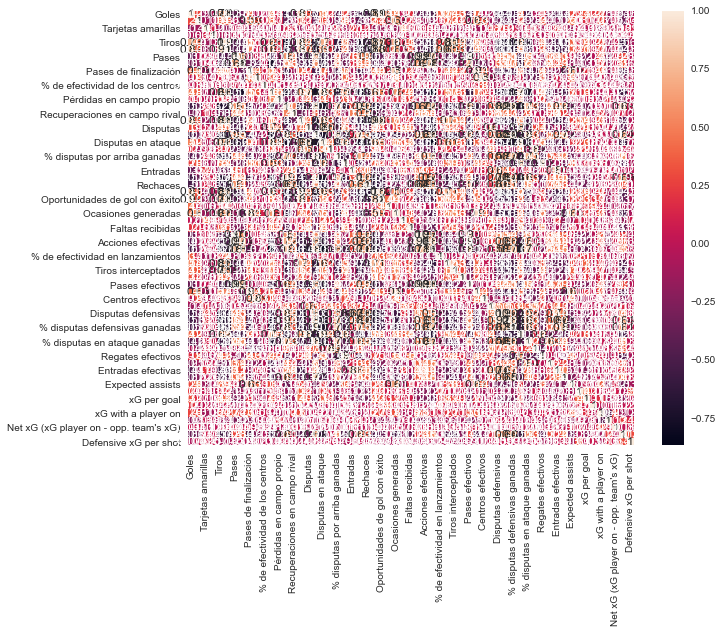

In [41]:
correlation_matrix = df_filt[rel_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot = True)
plt.show()

Por lógica de negocio, consideramos que, pese a que estamos segmentando por posiciones, una cantidad inferior a los cuatro clusters es reducida y simplifica demasiado el modelo. Por otro lado, no tenemos voluntad de que éste pierda en eficiencia en favor de la precisión, por lo que el nº máximo de clusters que procesaremos serán 6.

Para encontrar las similitudes nos basaremos en la distancia euclídea, en lugar de optar por el coeficiente de correlación

In [42]:
def player_similarities(player):
    pos = df_filt[df_filt.index==player]['Posición'].values[0]
    print('Buscando jugadores similares a {}'.format(player).upper())
    print('Starting model for {}'.format(pos))
    scaler = preprocessing.StandardScaler()
    norm = scaler.fit_transform(df_filt[rel_cols])
    df_norm = pd.DataFrame(norm,index=df_filt.index,columns=rel_cols)
    df_norm = pd.merge(df_norm,df_filt[['Posición']],how='left',left_index=True,right_index=True)
    df_norm = df_norm[df_norm['Posición']==pos]
    df_norm.drop('Posición',axis=1,inplace=True)
    pca_model = PCA(n_components=0.9, svd_solver='full')
    matrix_pca = pca_model.fit_transform(df_norm)
    df_pca = pd.DataFrame(matrix_pca, index=df_norm.index)
    df_pca.head(10)
    print('PCA - {} Components'.format(len(pca.components_[0])))
    var = pca_model.explained_variance_ratio_.cumsum()
    print('Variance Explained by the model: ',var[-1])
    
    # Plot: PCA
    plt.figure(figsize=(13.5, 9))
    plt.ylabel('% Varianza Explicada')
    plt.xlabel('Componentes')
    plt.title('PCA')
    plt.ylim(0.2,1)
    plt.plot(var)
    plt.show()
    
    # PLot: Dispersión
    plt.figure(figsize=(13.5, 9))
    ax = plt.axes()
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.scatter(df_pca[0], df_pca[1], c='red', s=50)
    plt.title('Dispersión de Jugadores tras aplicar PCA', fontsize=24, fontweight="bold", pad=15)

    for team in df_pca.index:
        plt.text(df_pca[0][team], df_pca[1][team], team)

    plt.show()
    
    # Plot: elbow
    view = elbow_method(df_pca,10)
    
    if view.elbow_value_>6:
        n = 6
    elif view.elbow_value_<4:
        n=4
    else:
        n = view.elbow_value_
    
    print('Aplicando KMeans para {} clusters'.format(n))
    kmeans_model = KMeans(n, random_state = 1)
    kmeans_var = kmeans_model.fit_predict(df_pca)

    df_pca['cluster'] = kmeans_model.labels_
    
    # Plot: Dispersión con Clusters
    labels = kmeans_model.labels_
    patches = []
    colors_array = ['red','blue','green', 'yellow']
    colors = ListedColormap(colors_array)
    plt.figure(figsize=(13.5, 9))
    plt.scatter(x=df_pca[0], y=df_pca[1], c=labels, cmap=colors, s=50)

    plt.title('K-Means para agrupar Jugadores similares', fontsize=24, fontweight="bold", pad=15)

    for team in df_pca.index:
        plt.text(df_pca[0][team], df_pca[1][team], team)

    for i in range(n):
        patches.append(mpatches.Patch(color=colors_array[i], label= "Cluster " + str(i)))

    plt.legend(handles=patches,bbox_to_anchor=(1.01, 1), loc=2, frameon=True, edgecolor='black', prop={'size': 14}, borderaxespad=0.)

    plt.show()
    
    y = df_pca[df_pca.index==player]
    print('Cluster de {}: {}'.format(player,y['cluster'].values[0]))
    euc = []
    for i in df_pca.values:
        euc.append(distance.euclidean(y.values,i))
    simil = pd.DataFrame(euc,index=df_pca.index,columns=['Similarity_Score'])
    simil = simil.sort_values(by='Similarity_Score',ascending=True)[1:]
    simil = pd.merge(simil,df_pca[['cluster']],how='left',left_index=True,right_index=True)
    
    return simil

BUSCANDO JUGADORES SIMILARES A DENIS SUAREZ
Starting model for MC
PCA - 23 Components
Variance Explained by the model:  0.9084837905094296


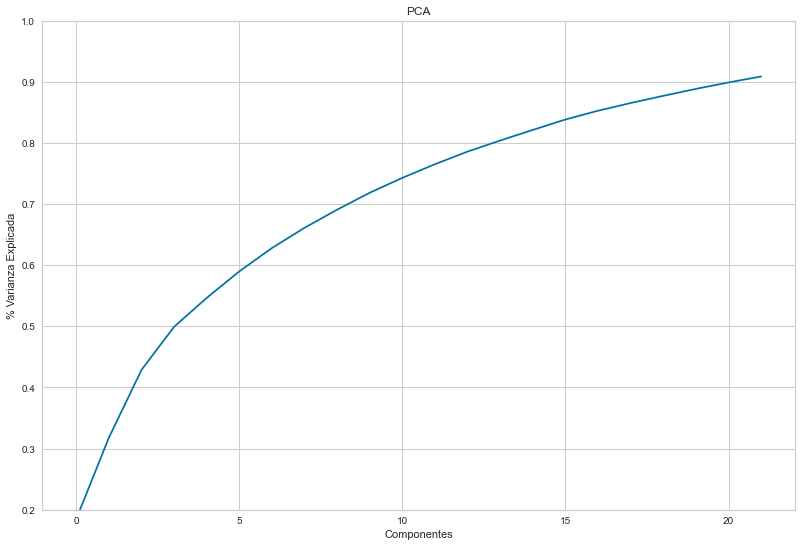

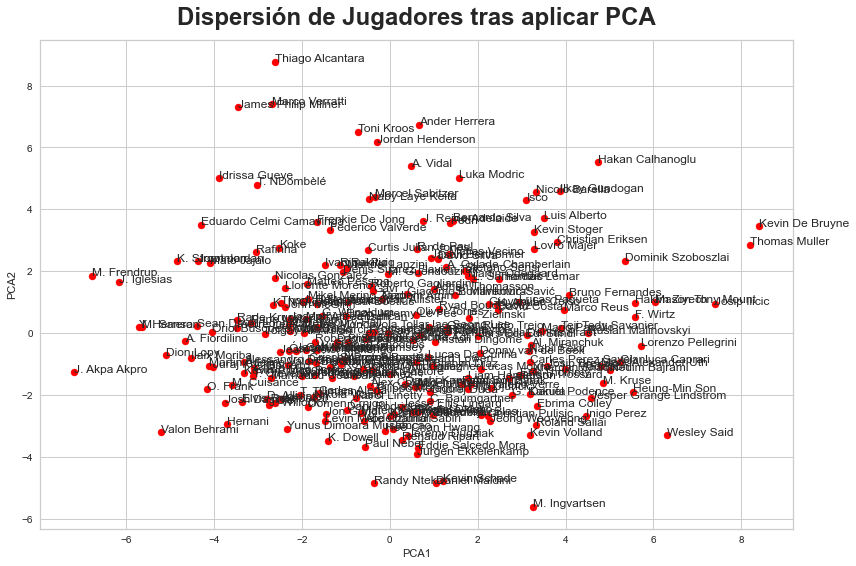

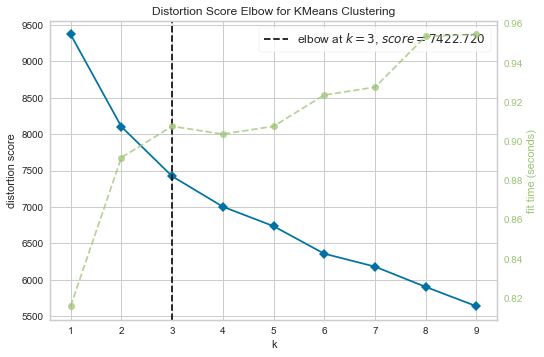

Aplicando KMeans para 4 clusters


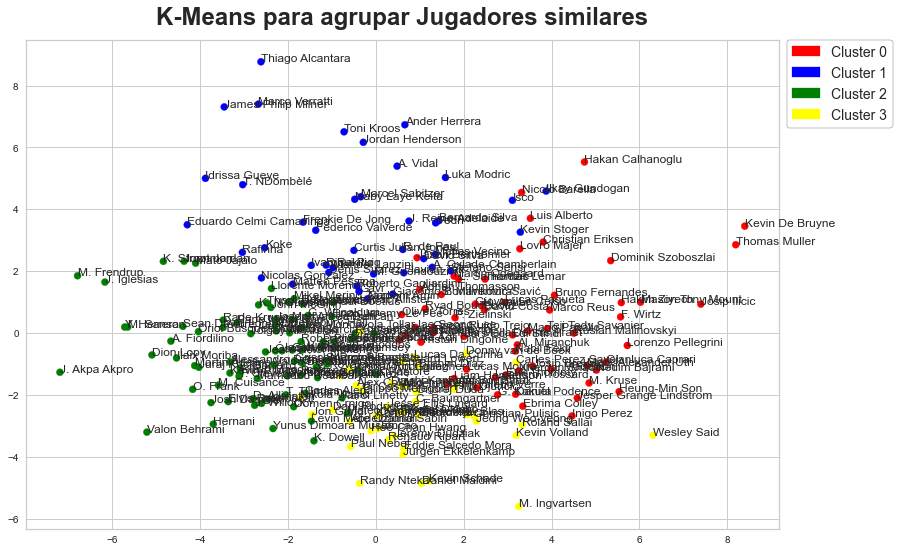

Cluster de Denis Suarez: 1


In [43]:
jug='Denis Suarez'
k= player_similarities(jug)

In [44]:
print('Top jugadores similares a {}'.format(jug))
k.head(25)

Top jugadores similares a Denis Suarez


Similarity_Score  cluster
Jugador                                        
Oliver Torres                 3.934338        0
Manuel Lanzini                3.955426        1
Ivan Rakitic                  4.034623        1
Jean-Paul Boetius             4.159477        2
Enzo Jeremy Le Fee            4.173170        2
M. Guendouzi                  4.179340        1
R. de Paul                    4.330125        1
Thomas Monconduit             4.357219        2
K. Dewsbury-Hall              4.385391        2
Jason Berthomier              4.535688        0
Pablo Fornals Malla           4.622609        0
Jacob Matthew Ramsey          4.667034        2
Ryad Boudebouz                4.695615        0
Flavien Tait                  4.703122        1
Roberto Soriano               4.762920        2
Koke                          4.925307        1
J. Bellegarde                 4.945791        2
Mathias Jensen                5.024261        2
Yacine Adli                   5.025038        0
Joseph Alfred Duncan          5.034981        2
Tolgay Ali Arslan             5.061588        2
Joan Jordan                   5.070861        2
K. N'Guessan                  5.126637        2
Adrien Thomasson              5.135279        0
P. Zielinski                  5.232612        0

In [45]:
cen_celta = df_filt[(df_filt['Equipo'].str.contains('Celta')) & (df_filt['Posición']=='MC')]
cen_celta

Índice InStat  Partidos jugados  Minutos jugados  \
Jugador                                                               
Denis Suarez                 232                38               90   
Oscar Rodriguez              232                29               90   
Carles Perez Sayol           231                19               90   

                    Starting lineup appearances  Jugador sustituido  \
Jugador                                                               
Denis Suarez                               0.99                0.60   
Oscar Rodriguez                            0.79                0.67   
Carles Perez Sayol                         0.43                0.57   

                    De sustitucion  Goles  Asistencias  Fueras de juego  \
Jugador                                                                   
Denis Suarez                  0.15   0.12         0.18             0.06   
Oscar Rodriguez               0.97   0.00         0.06             0.12   
Carles Perez Sayol            2.30   0.14         0.14             0.00   

                    Tarjetas amarillas  ...  Equipo  Selección nacional  Edad  \
Jugador                                 ...                                     
Denis Suarez                      0.12  ...   Celta                   -    28   
Oscar Rodriguez                   0.18  ...   Celta                   -    24   
Carles Perez Sayol                0.28  ...   Celta                   -    24   

                    Altura  Peso   Pierna  \
Jugador                                     
Denis Suarez           176    69  Derechа   
Oscar Rodriguez        171    67    Zurda   
Carles Perez Sayol     173    75    Zurda   

                    National team (last match date, mm.yy)  \
Jugador                                                      
Denis Suarez                                         05.16   
Oscar Rodriguez                                      09.20   
Carles Perez Sayol                                       -   

                    Youth national team (last match date, mm.yy)    Comp  \
Jugador                                                                    
Denis Suarez                                               06.17  LaLiga   
Oscar Rodriguez                                            11.20  LaLiga   
Carles Perez Sayol                                         10.19  SerieA   

                    Pierna_Buena  
Jugador                           
Denis Suarez                 1.0  
Oscar Rodriguez              0.0  
Carles Perez Sayol           0.0  

[3 rows x 83 columns]

Este verano el Celta ha asumido el fichaje -en forma de cesión, de momento- de Óscar Rodríguez. Se trata de un futbolista determinante desde la mediapunta -particularmente debido a su excelente golpeo de balón-, pero que nunca ha destacado en labores de organización. Este hecho cobra una relevancia si cabe superior en el caso del Celta, pues el sistema de Coudet propicia que el futbolista que ocupa la posición central en el tridente que se encuentra detrás de la pareja de delanteros sea el que asume prácticamente en solitario la elaboración del ataque. Sin ser la misma posición y actuando más adelantado, recuerda, cuando el Celta ataca en posicional y está instalado en campo rival, al papel de Jorginho en el Chelsea.

Eduardo Coudet ha apostado por Óscar en los primeros partidos de la temporada en la posición que anteriormente ocupaba Denis, prefiriendo al exmadridista por delante del canterano Gabri Veiga o del estadounidense Luca de la Torre. Veremos a continuación la similitud que el juego de Denis Suárez la temporada pasada y el del talaverano, de cara a poder valorar la adecuación de Óscar a este particular rol.

In [46]:
k['Rank'] = k['Similarity_Score'].rank()
k['Rank'] = k['Rank'].astype(int)
k_sel = k[(k.index.isin(list(cen_celta.index)))]

In [47]:
print('Numero de mcs analizados: ',k.shape[0])
k_sel['Rank']

Numero de mcs analizados:  228


Jugador
Oscar Rodriguez       101
Carles Perez Sayol    214
Name: Rank, dtype: int32

In [48]:
k.describe()

Similarity_Score     cluster       Rank
count        228.000000  228.000000  228.00000
mean           7.481082    1.491228  114.50000
std            2.117907    1.080428   65.96211
min            3.934338    0.000000    1.00000
25%            6.232778    0.000000   57.75000
50%            7.102437    2.000000  114.50000
75%            8.613072    2.000000  171.25000
max           20.548385    3.000000  228.00000

BUSCANDO JUGADORES SIMILARES A OSCAR RODRIGUEZ
Starting model for MC
PCA - 23 Components
Variance Explained by the model:  0.9084837905094296


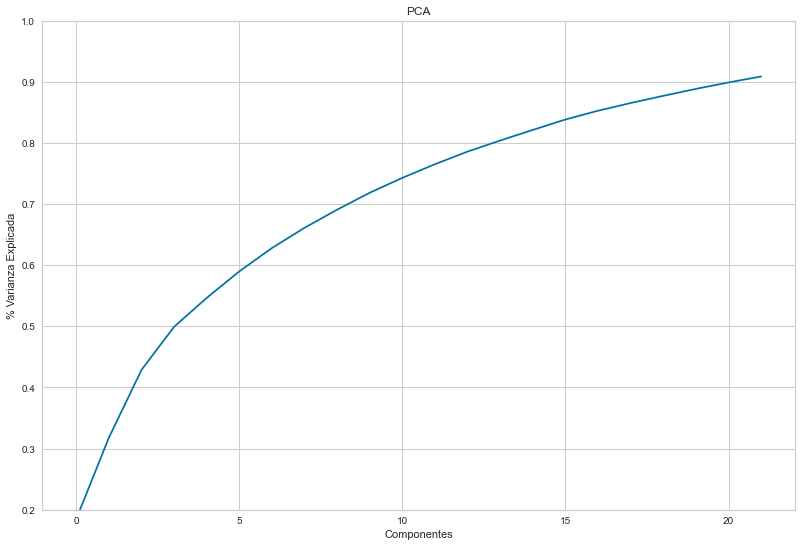

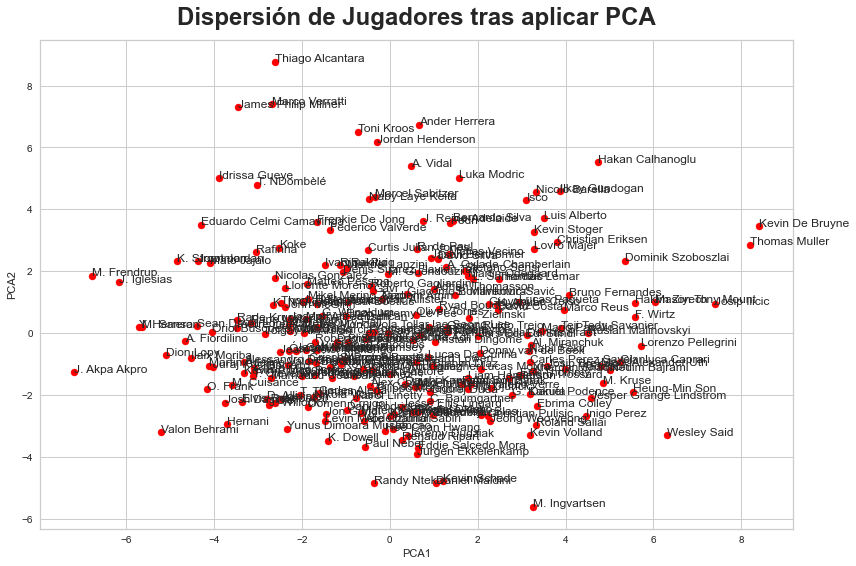

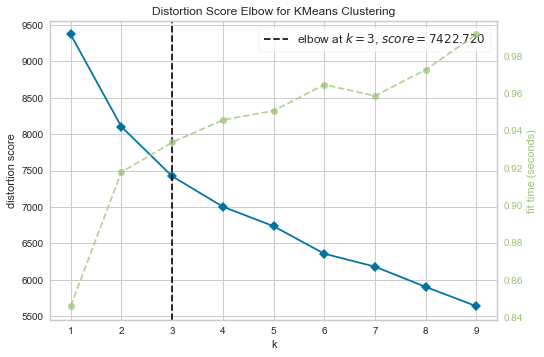

Aplicando KMeans para 4 clusters


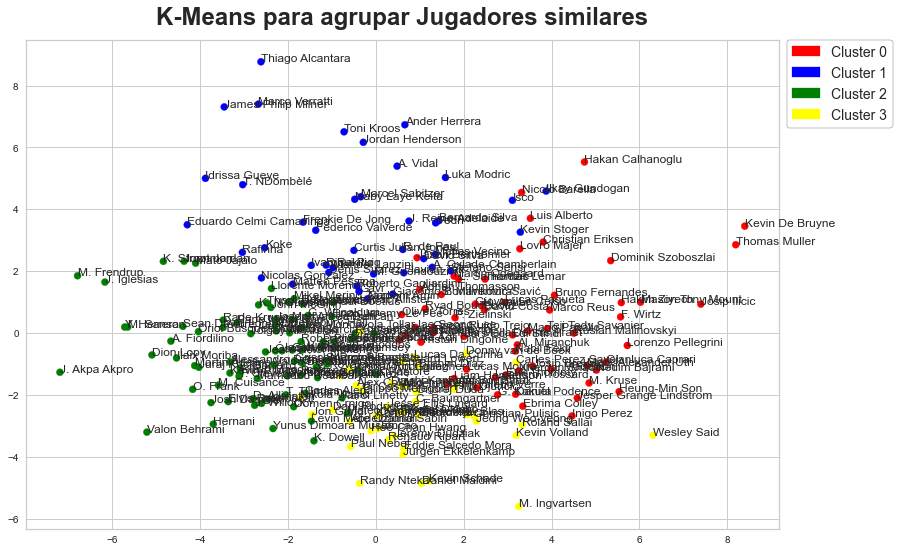

Cluster de Oscar Rodriguez: 2


In [49]:
jug='Oscar Rodriguez'
k= player_similarities(jug)

In [50]:
print('Jugadores similares a {}'.format(jug))
k.head(25)

Jugadores similares a Oscar Rodriguez


Similarity_Score  cluster
Jugador                                        
Daichi Kamada                 4.291656        3
Davide Frattesi               4.496194        2
Lucas Da Cunha                4.626503        3
Carles Alena                  4.735966        2
Ondrej Duda                   4.857688        3
Pablo Martínez                4.903607        2
Angelo Fulgini                4.921506        3
Razvan Gabriel Marin          5.018147        2
Dani Rodriguez                5.134989        3
Takefusa Kubo                 5.249071        3
Jeffrey Schlupp               5.319064        2
Jon Moncayola Tollar          5.337213        2
Darko Brasanac                5.379556        2
Renaud Ripart                 5.415441        3
L. Blas                       5.439190        3
Brahim Diaz                   5.465729        3
Elvis Rexhbecaj               5.500173        2
Alexis Mac Allister           5.530057        2
Genki Haraguchi               5.569957        2
W. McKennie                   5.594515        2
K. N'Guessan                  5.603062        2
Tolgay Ali Arslan             5.603895        2
K. Dewsbury-Hall              5.638321        2
Trincao                       5.664128        3
Leandro Trossard              5.680188        0

Según nuestro análisis, existen en las cinco grandes ligas exactamente 100 futbolistas más adecuados que Óscar para desempeñar el rol que otrora correspondía a Denis. El talaverano se encuentra entre el percentil 25 y el 50, y ligeramente por debajo de la media. Además, pertenece al cluster 2, mientras que Denis se encuentra en el 1, igual que futbolistas como Koke, Matteo Guendouzi, Ivan Rakitic o Flavian Tait, centrocampistas que se caracterizan por asumir una gran cantidad de volumen de pases. 

De hecho, observamos que, al obtener los jugadores más similares a Óscar, figuran perfiles claramente ligables a la posición de mediapunta o extremo (Trincao, Trossard, Schlupp, Brahim, Kamada o McAllister) y centrocampistas llegadores/todoterreno (Moncayola, McKennie, Brasanac). En definitiva, jugadores que asumen un papel lejano al organizativo en sus equipos y cuyo papel en la construcción del juego está mucho más ligado a la progresión mediante conducciones y a la creación directa de oportunidades mediante último pase o llegadas por sorpresa.

Si del equipo de analistas dependiera, se recomendaría al club acudir al mercado (o bien recurrir a Veiga o De la Torre) para desempeñar la función táctica comentada, destinando a Óscar a una de las dos posiciones en las alas, donde asumiría un volumen de juego inferior en construcción pero tendría la capacidad de pisar más área y también de conducir y generarse mejores situaciones para explotar su excelente pierna derecha.